# Construcción de un modelo lineal multivariable

Manuel Sánchez-Montañés

**En este notebook se usarán 5 técnicas para construir un modelo lineal multivariable:**

**1. LinearRegression con librería sklearn.**

**2. Con ecuaciones analíticas vistas en clase.**

**3. Con librería statsmodels.**

**4. LassoCV (regularización L1 con cross-validation para ajustar alpha óptimo) con librería sklearn.**

**4. RidgeCV (regularización L2 con cross-validation para ajustar alpha óptimo) con librería sklearn.**

In [1]:
from sklearn.datasets import load_diabetes
import pandas as pd

In [2]:
data = load_diabetes()

In [3]:
data.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [4]:
print(data["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
data["data"].shape # datos de entrada al modelo

(442, 10)

In [6]:
data["target"].shape

(442,)

In [7]:
data["feature_names"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [8]:
df = pd.DataFrame(data["data"], columns=data["feature_names"])
df["target"] = data["target"]
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-3.634285e-16,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.308343e-16,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-8.045349e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,1.281655e-16,0.047619,-0.112400,-0.036656,-0.005671,0.035644,0.132044
s1,442.0,-8.835316e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,1.327024e-16,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-4.574646e-16,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,3.777301e-16,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,-3.830854e-16,0.047619,-0.126097,-0.033249,-0.001948,0.032433,0.133599
s6,442.0,-3.412882e-16,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


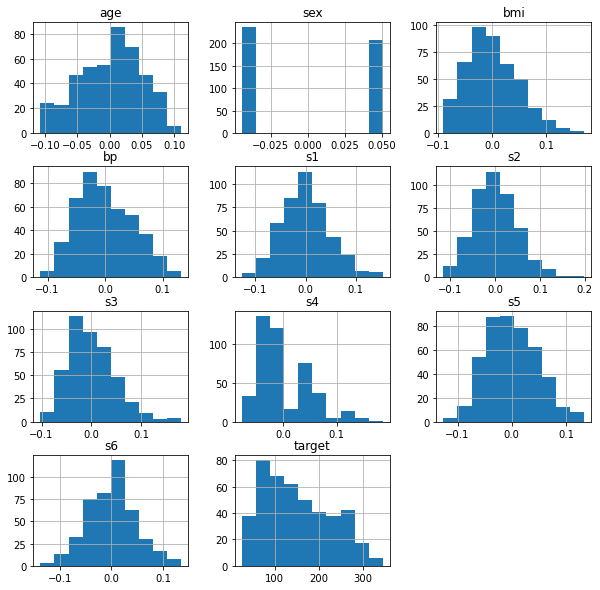

In [10]:
df.hist(figsize=(10,10));

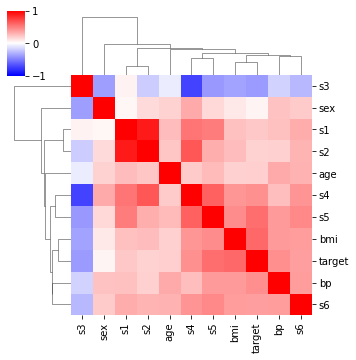

In [11]:
import seaborn as sns

sns.clustermap(df.corr(), cmap="bwr", vmin=-1, vmax=1, figsize=(5,5));

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=1)

In [14]:
X_train = df_train.drop("target", axis=1)
y_train = df_train["target"]
X_test  = df_test.drop("target", axis=1)
y_test  = df_test["target"]

# 1. Construcción del modelo lineal con sklearn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
model.score(X_train, y_train) # Coeficiente de determinación R2

0.5417930755782383

In [18]:
model.score(X_test, y_test) # Coeficiente de determinación R2

0.4384569849129575

In [19]:
# Otra forma equivalente de calcular los coeficientes R2:
from sklearn.metrics import r2_score

print(r2_score(y_train, model.predict(X_train))) # en training
print(r2_score(y_test, model.predict(X_test))) # en test

0.5417930755782383
0.4384569849129575


In [20]:
y_train[:10]

332    270.0
307    172.0
328     78.0
275     94.0
414    131.0
127    109.0
82      52.0
403    275.0
173    101.0
27      85.0
Name: target, dtype: float64

In [21]:
model.predict(X_train)[:10]

array([294.50710888, 142.45739494, 189.95498688, 153.8381543 ,
       163.15140065, 110.34508956,  67.3089336 , 252.91627415,
        91.68321513, 179.76380494])

In [22]:
import matplotlib.pyplot as plt

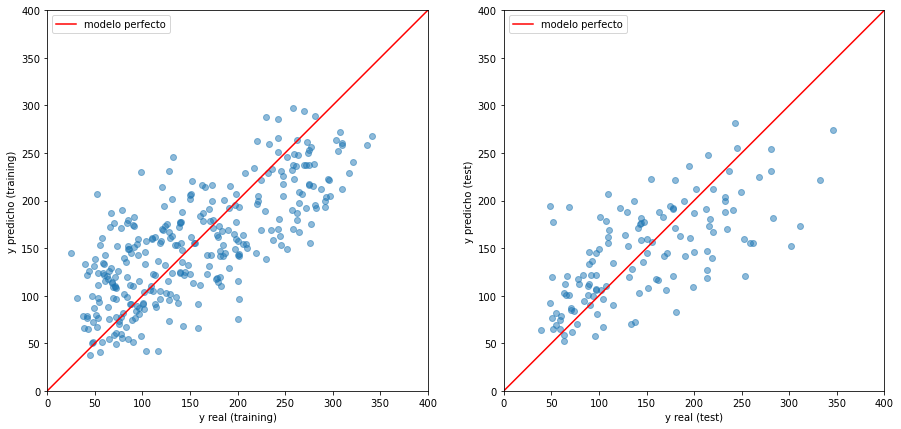

In [23]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.plot(y_train, model.predict(X_train), "o", alpha=0.5)
aux = [0, 400]
plt.plot(aux, aux, "r", label="modelo perfecto")
plt.xlim(aux)
plt.ylim(aux)
plt.xlabel("y real (training)")
plt.ylabel("y predicho (training)")
plt.legend()

plt.subplot(1,2,2)
plt.plot(y_test, model.predict(X_test), "o", alpha=0.5)
plt.plot([0,400], [0, 400], "r", label="modelo perfecto")
plt.xlim([0, 400])
plt.ylim([0, 400])
plt.xlabel("y real (test)")
plt.ylabel("y predicho (test)")
plt.legend();

**Coeficientes w:**

In [24]:
model.coef_

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

**Término constante:**

In [25]:
model.intercept_

151.43044828536836

# 2. Construcción del modelo lineal usando ecuaciones analíticas vistas en clase

In [26]:
import numpy as np

**Cálculo de la matriz de covarianza C y de su inversa:**

In [27]:
C = X_train.cov()
print("Dimensiones de C:", C.shape)
print("Rango de C:", np.linalg.matrix_rank(C))
print("Determinante de C:", np.linalg.det(C))
print()
print("Inversa de C:")
np.linalg.inv(C)

Dimensiones de C: (10, 10)
Rango de C: 10
Determinante de C: 1.5222423314660881e-30

Inversa de C:


array([[ 5.34872230e+02, -4.71379343e+01,  3.83644589e+00,
        -1.10923759e+02,  5.27863159e+00, -8.79896859e+01,
        -1.33126339e+01,  5.58100449e+01, -1.06477606e+02,
        -4.88529950e+01],
       [-4.71379343e+01,  5.69542143e+02,  1.06967964e+02,
        -1.49079727e+02,  2.38029838e+02, -1.59692239e+02,
         4.95667985e+01, -1.55267130e+02,  9.43110444e+00,
        -4.34848938e+01],
       [ 3.83644589e+00,  1.06967964e+02,  6.84011086e+02,
        -1.82159582e+02,  3.60833530e+02, -3.61675066e+02,
         9.21456582e+01,  6.68806339e+01, -2.99108562e+02,
        -9.95143967e+01],
       [-1.10923759e+02, -1.49079727e+02, -1.82159582e+02,
         7.16860633e+02, -2.47513314e+02,  1.62165958e+02,
         1.04884989e+02,  1.28377663e+02, -4.54548026e+01,
        -1.15585041e+02],
       [ 5.27863159e+00,  2.38029838e+02,  3.60833530e+02,
        -2.47513314e+02,  2.61033217e+04, -2.02269502e+04,
        -1.16953287e+04, -3.65414472e+03, -9.58669028e+03,
         1.

**Covarianza entre X e y:**

In [28]:
Xy = X_train.copy()
Xy["y"] = y_train
Xy.cov()["y"].drop("y")

age    0.773057
sex    0.139769
bmi    2.412959
bp     1.681213
s1     0.753420
s2     0.570397
s3    -1.535366
s4     1.661443
s5     2.236003
s6     1.470588
Name: y, dtype: float64

**Cálculo de w óptimo según ecuación desarrollada en clase:**

In [29]:
w = np.dot(np.linalg.inv(C), Xy.cov()["y"].drop("y"))
w

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

**Comparación con los coeficientes ajustados en sklearn:**

In [30]:
model.coef_

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

In [31]:
y_train.mean()

154.06472491909386

In [32]:
X_train.mean()

age    0.000681
sex    0.000089
bmi    0.002574
bp     0.003165
s1     0.001450
s2     0.000849
s3     0.000463
s4     0.000080
s5     0.000833
s6     0.002354
dtype: float64

**Cálculo del término constante según ecuación desarrollada en clase:**

In [33]:
y_train.mean() - np.dot(w, X_train.mean())

151.43044828536836

**Comparación con lo ajustado en sklearn:**

In [34]:
model.intercept_

151.43044828536836

# 3. Construcción del modelo lineal con librería statsmodels

In [35]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, sm.add_constant(X_train))
# OLS: "Ordinary Least Squares"
result = model2.fit()
display(result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     35.24
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           6.09e-45
Time:                        01:11:03   Log-Likelihood:                -1669.6
No. Observations:                 309   AIC:                             3361.
Df Residuals:                     298   BIC:                             3402.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.4304      3.129     48.398      0.000     145.273     157.588
age          -13.3048     72.114     -0.184      0.854    -155.223     128.613
sex         -238.0443     74.415     -3.199      0.002    -384.489     -91.599
bmi          582.2078     81.551      7.139      0.000     421.719     742.696
bp           345.7223     83.486      4.141      0.000     181.425     510.019
s1          -647.6121    503.784     -1.285      0.200   -1639.037     343.813
s2           340.8945    405.997      0.840      0.402    -458.090    1139.878
s3            90.1936    261.078      0.345      0.730    -423.597     603.985
s4           217.6192    195.970      1.110      0.268    -168.041     603.280
s5           664.5796    208.742      3.184      0.002     253.785    1075.374
s6            46.1225     77.570      0.595      0.553    -106.532     198.777
==============================================================================
Omnibus:                        6.291   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                4.049
Skew:                          -0.102   Prob(JB):                        0.132
Kurtosis:                       2.478   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que el $R^2$ ajustado es 0.526

**Ahora probamos a quitar, dentro de las variables con P>|t| mayor que el valor crítico, $\alpha = 0.05$ (confianza del 100·(1-0.05) = 95%), la que tiene mayor P, que es age:**

In [36]:
model2 = sm.OLS(y_train, sm.add_constant(X_train.drop(["age"], axis=1)))
result = model2.fit()
display(result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     39.27
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           9.58e-46
Time:                        01:11:03   Log-Likelihood:                -1669.6
No. Observations:                 309   AIC:                             3359.
Df Residuals:                     299   BIC:                             3396.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.4368      3.124     48.481      0.000     145.290     157.584
sex         -239.2168     74.023     -3.232      0.001    -384.889     -93.545
bmi          582.3032     81.417      7.152      0.000     422.080     742.527
bp           342.9632     82.003      4.182      0.000     181.587     504.339
s1          -647.4808    502.969     -1.287      0.199   -1637.289     342.327
s2           338.7058    405.167      0.836      0.404    -458.635    1136.047
s3            89.8624    260.650      0.345      0.731    -423.079     602.804
s4           219.0074    195.509      1.120      0.264    -165.740     603.755
s5           661.9310    207.911      3.184      0.002     252.777    1071.085
s6            44.9073     77.165      0.582      0.561    -106.948     196.763
==============================================================================
Omnibus:                        6.256   Durbin-Watson:                   2.008
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                4.022
Skew:                          -0.100   Prob(JB):                        0.134
Kurtosis:                       2.478   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que el $R^2$ ajustado ha mejorado, ahora es 0.528

**Ahora quitamos, además de age, la variable s3, que dentro de las variables con P>|t| mayor que $\alpha$ es ahora la que mayor P tiene:**

In [37]:
model2 = sm.OLS(y_train, sm.add_constant(X_train.drop(["age", "s3"], axis=1)))
result = model2.fit()
display(result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.529
Method:                 Least Squares   F-statistic:                     44.30
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           1.47e-46
Time:                        01:11:03   Log-Likelihood:                -1669.6
No. Observations:                 309   AIC:                             3357.
Df Residuals:                     300   BIC:                             3391.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3993      3.117     48.570      0.000     145.265     157.534
sex         -239.8372     73.892     -3.246      0.001    -385.250     -94.424
bmi          581.1208     81.226      7.154      0.000     421.277     740.965
bp           341.6540     81.794      4.177      0.000     180.690     502.618
s1          -497.5615    252.384     -1.971      0.050    -994.229      -0.894
s2           234.6093    269.779      0.870      0.385    -296.289     765.507
s4           173.2010    143.215      1.209      0.227    -108.632     455.034
s5           611.1812    146.612      4.169      0.000     322.663     899.700
s6            46.2827     76.949      0.601      0.548    -105.145     197.710
==============================================================================
Omnibus:                        6.325   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.067
Skew:                          -0.103   Prob(JB):                        0.131
Kurtosis:                       2.477   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que ahora el $R^2$ ajustado sube a 0.529

Sigue habiendo variables con P>$\alpha$. La que tiene entre ellas mayor P es s6, con lo cual la eliminamos también:

In [38]:
model2 = sm.OLS(y_train, sm.add_constant(X_train.drop(["age", "s3", "s6"], axis=1)))
result = model2.fit()
display(result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.530
Method:                 Least Squares   F-statistic:                     50.68
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           2.38e-47
Time:                        01:11:03   Log-Likelihood:                -1669.8
No. Observations:                 309   AIC:                             3356.
Df Residuals:                     301   BIC:                             3386.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.4473      3.113     48.653      0.000     145.322     157.573
sex         -236.2835     73.578     -3.211      0.001    -381.075     -91.492
bmi          588.5042     80.207      7.337      0.000     430.666     746.342
bp           351.0315     80.210      4.376      0.000     193.189     508.874
s1          -498.5373    252.111     -1.977      0.049    -994.661      -2.414
s2           239.1296    269.388      0.888      0.375    -290.992     769.251
s4           175.2186    143.024      1.225      0.221    -106.235     456.672
s5           622.4933    145.247      4.286      0.000     336.666     908.321
==============================================================================
Omnibus:                        5.808   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                3.812
Skew:                          -0.096   Prob(JB):                        0.149
Kurtosis:                       2.491   Cond. No.                         128.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que ahora el $R^2$ ajustado sube a 0.530

Ahora eliminamos también s2:

In [39]:
model2 = sm.OLS(y_train, sm.add_constant(X_train.drop(["age", "s3", "s6", "s2"], axis=1)))
result = model2.fit()
display(result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     59.04
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           4.36e-48
Time:                        01:11:03   Log-Likelihood:                -1670.2
No. Observations:                 309   AIC:                             3354.
Df Residuals:                     302   BIC:                             3381.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.3800      3.111     48.662      0.000     145.258     157.502
sex         -229.0359     73.098     -3.133      0.002    -372.881     -85.191
bmi          603.6742     78.338      7.706      0.000     449.517     757.832
bp           350.6028     80.180      4.373      0.000     192.820     508.385
s1          -286.3810     80.211     -3.570      0.000    -444.224    -128.538
s4           268.5872     96.880      2.772      0.006      77.941     459.233
s5           522.7324     91.981      5.683      0.000     341.728     703.737
==============================================================================
Omnibus:                        5.967   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                3.746
Skew:                          -0.068   Prob(JB):                        0.154
Kurtosis:                       2.478   Cond. No.                         38.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Y el $R^2$ ajustado sube ahora a 0.531

Ahora ninguna variable tiene P>|t| mayor que el umbral 0.05, por lo que no habría que seguir eliminando ninguna.
Si aun así eliminamos la que tiene mayor P, s4:

In [40]:
model2 = sm.OLS(y_train, sm.add_constant(X_train.drop(["age", "s3", "s6", "s2", "s4"], axis=1)))
result = model2.fit()
display(result.summary())

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     67.81
Date:                Fri, 20 Oct 2023   Prob (F-statistic):           2.14e-47
Time:                        01:11:03   Log-Likelihood:                -1674.1
No. Observations:                 309   AIC:                             3360.
Df Residuals:                     303   BIC:                             3383.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        151.1460      3.144     48.078      0.000     144.960     157.332
sex         -155.6534     68.885     -2.260      0.025    -291.206     -20.101
bmi          650.8859     77.304      8.420      0.000     498.766     803.006
bp           326.4064     80.578      4.051      0.000     167.843     484.970
s1          -203.7338     75.282     -2.706      0.007    -351.876     -55.591
s5           623.9923     85.344      7.311      0.000     456.050     791.935
==============================================================================
Omnibus:                        4.528   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.104   Jarque-Bera (JB):                2.993
Skew:                          -0.012   Prob(JB):                        0.224
Kurtosis:                       2.518   Cond. No.                         33.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Vemos que el $R^2$ ajustado empeora ahora: baja a 0.520, indicando que el modelo es peor.

Por tanto, a través de los estadísticos P>|t| hemos ido simplificando y mejorando el modelo eliminando variables innecesarias, en el sentido de que no aportan información relevante al modelo. En nuestro caso, las variables detectadas como innecesarias son age, s3, s6 y s2. Esta es una de las técnicas para abordar lo que se denomina **"selección de variables"**.

In [41]:
preds_test = result.predict(sm.add_constant(X_test.drop(["age", "s3", "s6", "s2", "s4"], axis=1)))

/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [42]:
# R2 con statsmodels + eliminación de variables por P-values:

r2_score(y_test, preds_test)

0.40969316102405795

# 4. Construcción del modelo lineal con LassoCV (regularización L1 con cross-validation para ajustar alpha óptimo) con librería sklearn

Ejercicio:
    
* Crear un modelo con regularización L1 con todas las variables originales.
* Chequea su R2 en test. ¿Es mejor que los anteriores del notebook?
* ¿Usa todas las variables? Comparar con el modelo creado con statsmodels
* Hacer lo mismo con regularización L2

In [43]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline

model3 = Pipeline([('scaler', StandardScaler()), ('LR', LassoCV())])
ymean, ystd = y_train.mean(), y_train.std()

y_train_scaled = (y_train - ymean) / ystd
y_test_scaled = (y_test - ymean) / ystd

model3.fit(X_train, y_train_scaled)
print(model3.score(X_test, y_test_scaled))

y_predicted_scaled = model3.predict(X_test)
y_predicted = ymean + ystd*y_predicted_scaled
r2_score(y_test, y_predicted)

0.4335362733554443


0.4335362733554443

In [44]:
model3["LR"].coef_

array([-0.        , -0.11749331,  0.35614648,  0.18235758, -0.07165024,
       -0.        , -0.10555001,  0.02674713,  0.29926166,  0.0215278 ])

In [45]:
X_test.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [46]:
model.coef_

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

**Nota: relación entre los coeficientes de un modelo lineal usando las variables sin estandarizar, y otro con las variables estandarizadas**

In [47]:
# Modelo lineal (sin regularizar) con las variables estandarizadas:

model4 = Pipeline([('scaler', StandardScaler()), ('LR', LinearRegression())])
model4.fit(X_train, y_train_scaled)
print("Coeficientes w:", model4["LR"].coef_)
print("Término b     :", model4["LR"].intercept_)

Coeficientes w: [-0.00795921 -0.14240437  0.35369239  0.1999526  -0.39694488  0.20566525
  0.05291071  0.13042557  0.40907921  0.02807411]
Término b     : -1.5266603456472376e-16


In [48]:
# Modelo lineal (sin regularizar) con las variables originales (sin estandarizar):

print("Coeficientes w:", model.coef_)
print("Término b     :", model.intercept_)

Coeficientes w: [ -13.30476433 -238.04429689  582.20780727  345.72234704 -647.61205846
  340.89449144   90.19356558  217.6191519   664.57956633   46.12251913]
Término b     : 151.43044828536836


**Modelo con variables sin estandarizar:**

$
\hat y_i = b + {\bf w}^T \cdot {\bf x} = b + \sum_j w^{(j)} \cdot x^{(i)}
$

**Modelo con variables estandarizadas:**

$
\left( \frac{\hat y_i - \overline y}{std(y)} \right) = b' + \sum_j v^{(j)} \cdot \left( \frac{x^{(j)}_i - \overline{x^{(j)}}}{std(x^{(j)})} \right)
$

Reorganizando nos queda:

$
\hat y_i = \overline y + std(y) \cdot \left[ b' + \sum_j v^{(j)} \cdot \left( \frac{x^{(j)}_i - \overline{x^{(j)}}}{std(x^{(j)})} \right) \right]
$

y reorganizando un poco más, nos queda:

$
\hat y_i = \left[ \overline y + std(y) \cdot \left( b' - \sum_j \frac{v^{(j)} \cdot \overline{x^{(j)}}}{std(x^{(j)})} \right) \right] + \sum_j \left[ \left( \frac{std(y) \cdot v^{(j)}}{std(x^{(j)})} \right) \cdot x^{(j)}_i \right]
$

Con lo cual, nos queda la siguiente relación entre un modelo lineal entrenado con las variables originales y otro entrenado con las variables estandarizados (ambos modelos sin regularizar):

(1)$\,\,\,$ $
b = \overline y + std(y) \cdot \left( b' - \sum_j \frac{v^{(j)} \cdot \overline{x^{(j)}}}{std(x^{(j)})} \right)
$

(2)$\,\,\,$ $
w^{(j)} = \frac{std(y) \cdot v^{(j)}}{std(x^{(j)})}
$

In [49]:
# Coeficientes w del modelo ajustado con variables originales:

model.coef_

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

In [50]:
# Coeficientes v del modelo ajustado con variables estandarizadas:

model4["LR"].coef_

array([-0.00795921, -0.14240437,  0.35369239,  0.1999526 , -0.39694488,
        0.20566525,  0.05291071,  0.13042557,  0.40907921,  0.02807411])

In [51]:
# Coeficientes w del modelo con variables originales
# obtenidos a partir del modelo ajustado con variables estandarizadas:

model4["LR"].coef_*ystd/X_train.std(ddof=0).values

array([ -13.30476433, -238.04429689,  582.20780727,  345.72234704,
       -647.61205846,  340.89449144,   90.19356558,  217.6191519 ,
        664.57956633,   46.12251913])

In [52]:
# b del modelo ajustado con variables originales:

model.intercept_

151.43044828536836

In [53]:
# b' del modelo ajustado con variables estandarizadas:

model4["LR"].intercept_

-1.5266603456472376e-16

In [54]:
# b del modelo con variables originales
# obtenido a partir del modelo ajustado con variables estandarizadas:

ymean + ystd*(model4["LR"].intercept_ - sum(model4["LR"].coef_*X_train.mean()/X_train.std(ddof=0)))

151.43044828536836

**Como vemos, las ecuaciones (1) y (2) se cumplen exactamente**

# 5. Construcción del modelo lineal con RidgeCV (regularización L2 con cross-validation para ajustar alpha óptimo) con librería sklearn

In [55]:
# Ejercicio: realizar este apartado